# Linearization Methods

In [1]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
import scipy.stats
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import matplotlib.pyplot as plt
import scipy.optimize as opt
from LinApp_FindSS import LinApp_FindSS
from LinApp_Deriv import LinApp_Deriv
from LinApp_Solve import LinApp_Solve
from LinApp_SSL import LinApp_SSL

## Problem 1

\begin{aligned} F &=\frac{\alpha \overline{K}^{a-1}}{\overline{K}^{\alpha}-\overline{K}} \\ G &=-\frac{\alpha \overline{K}^{\alpha-1}\left(\alpha+\overline{K}^{\alpha-1}\right)}{\overline{K}^{\alpha}-\overline{K}} \\ H &=\frac{\alpha^{2} \overline{K}^{2(\alpha-1)}}{K^{\alpha}-K} \\ L &=-\frac{\alpha \overline{K}^{2 \alpha-1}}{\overline{K}^{\alpha}-\overline{K}} \\ M &=\frac{\alpha^{2} \overline{K}^{2(\alpha-1)}}{K^{\alpha}-K} \end{aligned}

In [2]:
alpha = 0.4
beta = 0.98
rho = 0.95
sigma = 0.02
A = alpha * beta
Kbar = A ** (1/(1-alpha))

In [3]:
F = (alpha * beta * Kbar ** (alpha - 1)) / (Kbar ** alpha - Kbar)
# We can express the rest of the matrices in terms of F
G = - F * (alpha + Kbar ** (alpha - 1))
H = F * alpha * (Kbar ** (alpha - 1))
L = - F * Kbar
M = F * (Kbar ** alpha)
N = rho

In [4]:
P1 = (-G + np.sqrt(G ** 2 - 4 * F * H)) / (2 * F)
P2 = (-G - np.sqrt(G ** 2 - 4 * F * H)) / (2 * F)
Q = - (L * N + M) / (F*N + F*P1 + G)

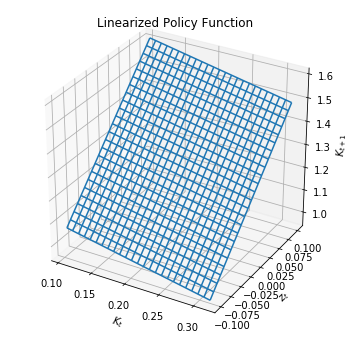

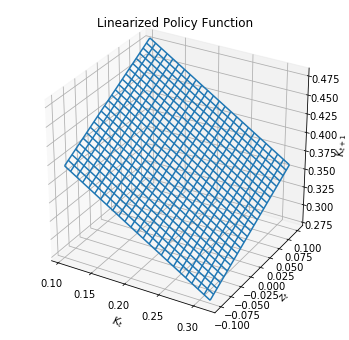

In [5]:
K_min = 0.5 * Kbar  
K_max = 1.5 * Kbar 
Z_min = -5 * sigma
Z_max = 5 * sigma
num_pts = 25

Kgrid = np.linspace(K_min, K_max, num_pts)
Zgrid = np.linspace(Z_min, Z_max, num_pts)
K, Z = np.meshgrid(Kgrid, Zgrid)

def linear_policy(K, z, P, Q, Kbar):
    return Kbar + P * (K + Kbar) + Q*z

poly_vals1 = np.zeros((num_pts, num_pts))
for i in range(num_pts):
    poly_vals1[i,:] = linear_policy(Kgrid[i], Zgrid, P1, Q, Kbar)

poly_vals2 = np.zeros((num_pts, num_pts))
for i in range(num_pts):
    poly_vals2[i,:] = linear_policy(Kgrid[i], Zgrid, P2, Q, Kbar)

fig = plt.figure(figsize=(6,6))
ax = fig.gca(projection='3d')
surf = ax.plot_wireframe(K, Z, poly_vals1)
ax.set_xlabel(r'$K_t$')
ax.set_ylabel(r'$z_t$')
ax.set_zlabel(r'$K_{t+1}$')
plt.title("Linearized Policy Function")

fig = plt.figure(figsize=(6,6))
ax = fig.gca(projection='3d')
surf = ax.plot_wireframe(K, Z, poly_vals2)
ax.set_xlabel(r'$K_t$')
ax.set_ylabel(r'$z_t$')
ax.set_zlabel(r'$K_{t+1}$')
plt.title("Linearized Policy Function")
plt.show()

## Problem 2

I will use Dr. Phillips' sample code to solve this problem.

In [6]:
def Gamma(invex, mparams):
    
    kpp, kp, k, zp, z = invex
    alpha, beta = mparams
    
    # exponentiate variables    
    k = np.exp(k)
    kp = np.exp(kp)
    kpp = np.exp(kpp)

    # Calculate Euler equation
    E = ( beta * ( (alpha * np.exp(z) * kp ** (alpha - 1)) * (np.exp(z) * k ** alpha - kp) ) ) / (np.exp(zp) * kp ** alpha - kpp) 

    return E

In [13]:
alpha = .35
beta = 0.98
zbar = 0
mparams = np.array([alpha, beta])

In [14]:
# Analytical steady state
Kbar = (alpha * beta) ** (1 / (1 - alpha))
Kbar

0.1927826194504225

In [15]:
invec = np.array([Kbar, Kbar, Kbar, 0., 0.])

### Solving for Steady State Parameters

In [16]:
nx = 1  # number of X variables
ny = 0  # number of Y variables
nz = 1  # number of Z variables
takelogs = True  # if True the model is log-linearized

[AA, BB, CC, DD, FF, GG, HH, JJ, KK, LL, MM] = \
    LinApp_Deriv(Gamma, mparams, invec, nx, ny, nz, takelogs)

# set the options for LinApp_Solve
Sylv = False

# NN is the autoregressive parameter in z's law of motion
rho = 0.95
NN = rho

# solve for coefficients
PP, QQ, RR, SS = \
    LinApp_Solve(AA, BB, CC, DD, FF, GG, HH, JJ, KK, LL, MM, NN, zbar, Sylv)


print('PP:',PP)
print('QQ', QQ)

PP: [[0.35]]
QQ [[7.34392732]]


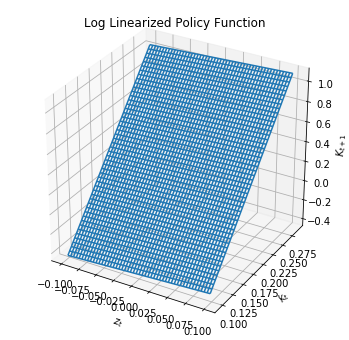

In [17]:
K_min = 0.5 * Kbar  
K_max = 1.5 * Kbar 
Z_min = -5 * sigma
Z_max = 5 * sigma
num_pts = 50

Kgrid = np.linspace(K_min, K_max, num_pts)
Zgrid = np.linspace(Z_min, Z_max, num_pts)
K, Z = np.meshgrid(Kgrid, Zgrid)

def linear_policy(K, z, P, Q, Kbar):
    return Kbar + P * (K + Kbar) + Q*z

poly_vals = np.zeros((num_pts, num_pts))
for i in range(num_pts):
    poly_vals[i,:] = linear_policy(Kgrid[i], Zgrid, PP, QQ, Kbar)

fig = plt.figure(figsize=(6,6))
ax = fig.gca(projection='3d')
surf = ax.plot_wireframe(Z, K, poly_vals)
ax.set_xlabel(r'$z_t$')
ax.set_ylabel(r'$k_t$')
ax.set_zlabel(r'$K_{t+1}$')
plt.title("Log Linearized Policy Function")
plt.show()

## Problem 3

Please refer to pdf solution. 

## Problem 4

In [18]:
def modeldefs(Xn, Xp, Y, Z, mparams):
    
    # unpack input vectors
    k = Xn                         
    kp = Xp                         
    l = Y
    z = Z                             

    [alpha, beta, gamma, delta, tau, sigma, a] = mparams
    y = (k ** alpha) * (l * np.exp(z)) ** (1 - alpha)
    r = alpha * k ** (alpha - 1) * (l * np.exp(z)) ** (1 - alpha)
    w = k ** alpha * (1 - alpha) * (l * np.exp(z)) ** (-alpha) * np.exp(z)
    T = tau * (w * l + (r - delta) * k)
    c = (1 - tau) * (w * l + (r - delta) * k) + k + T - kp
    u = (c ** (1 - gamma) - 1) / (1 - gamma) + a * (((1 - l) ** (1 - xi)) - 1) / (1 - xi)

    return y, r, w, c, T, u

In [19]:
def Gamma(invex, mparams):
    
    [alpha, beta, gamma, delta, tau, sigma, a] = mparams
    xpp, xp, x, Yp, Y, zp, z = invex
    lp = Yp
    l = Y
    
    # find period t values
    y, r, w, c, T, u = modeldefs(x, xp, l, z, mparams)
    
    # find period t+1 values
    yp, rp, wp, cp, Tp, up = modeldefs(xpp, xp, lp, zp, mparams)
    
    # calculate Euler equation
    E1 = a * (1-l)**(-xi) - w * (1 - tau) * c**(-gamma)
    E2 = c**(-gamma) - beta* cp**(-gamma) * ((1 - tau)*(rp - delta) + 1)
    
    return np.array([E1, E2])

### Finding the Steady State 

In [20]:
alpha = .40
beta = .98
gamma = 2.5
delta = .10
rho = .9
sigma = .01
xi = 1.5
a = 0.5
tau = 0.05
mparams = [alpha, beta, gamma, delta, tau, sigma, a]

In [29]:
guessXY = np.array([1., .5]) # guess for state variables k and l 
zbar = np.array([0.])
XYbar = LinApp_FindSS(Gamma, mparams, guessXY, zbar, 1, 1)
kbar = XYbar[0]
lbar = XYbar[1]

# check solution works
invec = np.array([kbar, kbar, kbar, lbar, lbar, 0., 0.])
check = Gamma(invec, mparams)
print('kbar: ', kbar)
print('lbar: ', lbar)
print('check:', check)

kbar:  4.225229026772432
lbar:  0.5797914531669489
check: [-1.74749104e-13 -2.57349697e-13]


In [22]:
ybar, rbar, wbar, cbar, Tbar, ubar = modeldefs(kbar, kbar, lbar, zbar, mparams)
print('ybar: ', ybar)
print('rbar: ', rbar)
print('wbar: ', wbar)
print('cbar: ', cbar)
print('Tbar: ', Tbar)
print('ubar: ', ubar)

ybar:  [1.28322611]
rbar:  [0.12148228]
wbar:  [1.32795277]
cbar:  [0.86070321]
Tbar:  [0.04303516]
ubar:  [-0.71087264]


### Problem 5

In [23]:
alpha = .33
beta = .95
gamma = 2.5
delta = .08
rho = .9
sigma = .02
xi = 1.5
a = 0.5
tau = 0.05
zbar = 0

In [24]:
def solve_ss_vals(args):
    alpha, beta, gamma, delta, tau, sigma, a, zbar = args
    mparams = np.array([alpha, beta, gamma, delta, tau, sigma, a])
    zbar = np.array([zbar])
    guessXY = np.array([1., .5]) # guess for state variables k and l 
    XYbar = LinApp_FindSS(Gamma, mparams, guessXY, zbar, 1, 1)
    kbar = XYbar[0]
    lbar = XYbar[1]
    ybar, rbar, wbar, cbar, Tbar, ubar = modeldefs(kbar, kbar, lbar, zbar, mparams)
    ibar = kbar - (1 - delta) * kbar
    
    return np.array([kbar, cbar, rbar, wbar, lbar, Tbar, ybar, ibar])

In [25]:
def derivative(f_h1, f_h2, epsilon):
    '''
    f_h1 = f(x0 + h)
    f_h2 = f(x0 - h)
    '''
    return (f_h1 - f_h2) / (2 * epsilon)

In [26]:
deriv = np.empty((8, 8))

args_h1 = np.array([alpha, beta, gamma, delta, tau, sigma, a, zbar])
args_h2 = np.array([alpha, beta, gamma, delta, tau, sigma, a, zbar])

# choose small epsilon
epsilon = 1e-8
for i in range(len(args_h1)):
    args_h1[i] += epsilon
    args_h2[i] -= epsilon
    deriv[:, i] = derivative(solve_ss_vals(args_h1), solve_ss_vals(args_h2), epsilon)
    args_h1[i] -= epsilon
    args_h2[i] += epsilon

In [27]:
ss_names = np.array(['kss', 'css', 'rss', 'wss', 'lss', 'Tss', 'yss', 'iss'])
params_names = np.array(['δ', 'τ', r'$\bar{z}$', 'α', 'γ', 'ξ', 'β', 'a'])
comp_stat = pd.DataFrame(deriv, ss_names, params_names)
comp_stat.round(decimals=3)

,δ,τ,$\bar{z}$,α,γ,ξ,β,a
kss,12.520,28.781,0.135,-21.066,-1.941,0.0,-0.954,1.566
css,1.299,1.444,0.045,-2.327,-0.238,0.0,-0.315,0.517
rss,0.000,-1.166,-0.000,1.000,0.058,0.0,-0.000,0.000
wss,2.062,4.408,0.000,-3.780,-0.220,0.0,0.000,1.039
lss,-0.615,-0.145,0.036,1.079,-0.126,0.0,-0.252,-0.189
Tss,0.065,0.072,0.002,-0.116,0.742,0.0,-0.016,0.026
yss,2.301,3.746,0.055,-1.731,-0.393,0.0,-0.391,0.642
iss,1.002,2.302,0.011,0.596,-0.155,0.0,-0.076,0.125


## Problem 6

### Solving for the Policy Function Parameters

In [30]:
# find derivatives of Gamma

# set the options for LinApp_Deriv
nx = 1  # number of X variables
ny = 1  # number of Y variables
nz = 1  # number of Z variables
takelogs = False  # if True the model is log-linearized, otherwise simple linearization

[AA, BB, CC, DD, FF, GG, HH, JJ, KK, LL, MM] = \
    LinApp_Deriv(Gamma, mparams, invec, nx, ny, nz, takelogs)

# set the options for LinApp_Solve
Sylv = False  # if True use Python's built-in Sylvester equation solver, otherwise us the code in LinApp_Solve

# NN is the autoregressive parameter in z's law of motion
NN = rho
# solve for coefficients
PP, QQ, RR, SS = \
    LinApp_Solve(AA, BB, CC, DD, FF, GG, HH, JJ, KK, LL, MM, NN, zbar, Sylv)

print('FF: ', FF)
print('GG: ', GG)
print('HH: ', HH)
print('LL: ', LL)
print('MM: ', MM)
print('NN: ', NN)
print('PP:',PP)
print('QQ', QQ)

FF:  [[4.34038658]]
GG:  [[-1.11022302e-11]]
HH:  [[-4.31701813]]
LL:  [[3.15518743]]
MM:  [[-3.25392451]]
NN:  0.9
PP: [[-0.37169166]]
QQ [[-0.44135216]]


## Problem 7

### Simulating the Model

In [35]:
# generate a history of Z's
T = 1000  # number of observations to generate

# initialize Z
zhist = np.zeros((T,1))

# generate a history of epsilon shocks with mean zero and variance sigma-squared
epshist = np.random.randn(T,1) * sigma

# iteratively generate Z's starting with the first value of Z = 0
for t in range (1,T):
    zhist[t,:] = rho*zhist[t-1,:] + epshist[t,:]
    
# generate a history of k's
#kbar2 = np.array([[XYbar]])
kbar2 = np.array([[kbar]])
khist, lhist = LinApp_SSL(kbar2, zhist, XYbar, takelogs, PP, QQ, RR, SS)

# generate a history of l's
#lbar2 = np.array([[lbar]])
#khist, lhist = LinApp_SSL(lbar2, zhist, lbar2, takelogs, PP, QQ, RR, SS)

In [36]:
# initialize histories of all other variables
yhist = np.zeros(T)
rhist = np.zeros(T)
whist = np.zeros(T)
chist = np.zeros(T)
Thist = np.zeros(T)
uhist = np.zeros(T)

# set initial values noting we started at the steady state
yhist[0] = ybar
rhist[0] = rbar
whist[0] = wbar
chist[0] = cbar
Thist[0] = Tbar
uhist[0] = ubar

#compute values for all other time periods
for t in range(1, T-1):
    yhist[t], rhist[t], whist[t], chist[t], Thist[t], uhist[t] = \
        modeldefs(khist[t-1], khist[t], lhist[t], zhist[t,:], mparams)

#yhist, rhist, whist, chist, uhist = modeldefs(khist[1:], khist[:-1], lhist[:-1], zhist[:-1, :], *mparams)

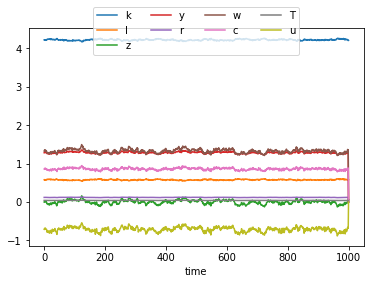

In [37]:
t = range(0, T)
plt.plot(t, khist, label='k')
plt.plot(t, lhist, label='l')
plt.plot(t, zhist, label='z')
plt.plot(t, yhist, label='y')
plt.plot(t, rhist, label='r')
plt.plot(t, whist, label='w')
plt.plot(t, chist, label='c')
plt.plot(t, Thist, label='T')
plt.plot(t, uhist, label='u')
plt.xlabel('time')
plt.legend(loc=9, ncol=4, bbox_to_anchor=(0., 1.02, 1., .102))
plt.show()

### Getting Statistics from Simulation

In [38]:
gamma = 2.5
xi = 1.5
beta = 0.98
alpha = 0.4
a = 0.5
delta = 0.10
zbar = 0
rho = 0.9
tau = 0.05
sigma = 0.02
simulations = 10000
periods = 250

In [43]:
def simulations(simulations, periods):
    
    gdp = np.zeros((simulations, periods-1))
    consum = np.zeros((simulations, periods-1))
    invest = np.zeros((simulations, periods-1))
    labor = np.zeros((simulations, periods-1))
    
    for s in range(simulations):
        epshist = np.random.randn(periods,1) * sigma

        # iteratively generate Z's starting with the first value of Z = 0
        zhist = np.zeros((periods,1))
        for t in range(1, periods):
            zhist[t,:] = rho*zhist[t-1,:] + epshist[t,:]
        khist, lhist = LinApp_SSL(kbar2, zhist, XYbar, takelogs, PP, QQ, RR, SS)

        # initialize histories of all other variables
        yhist = np.zeros(periods)
        rhist = np.zeros(periods)
        whist = np.zeros(periods)
        chist = np.zeros(periods)
        Thist = np.zeros(periods)
        uhist = np.zeros(periods)

        # set initial values noting we started at the steady state
        yhist[0] = ybar
        rhist[0] = rbar
        whist[0] = wbar
        chist[0] = cbar
        Thist[0] = Tbar
        uhist[0] = ubar

        #compute values for all other time periods
        for t in range(1, periods-1):
            yhist[t], rhist[t], whist[t], chist[t], Thist[t], uhist[t] = \
                modeldefs(khist[t-1], khist[t], lhist[t], zhist[t,:], mparams)
        
        
        ihist = khist[:-1] - (1 - delta) * khist[1:]
        
        gdp[s,:] = yhist[:-1]
        consum[s,:] = chist[:-1]
        invest[s,:] = ihist.flatten()
        labor[s,:] = lhist[:-1].flatten()
        
    return gdp, consum, invest, labor 

In [44]:
gdp, consum, invest, labor = simulations(10000, 250)

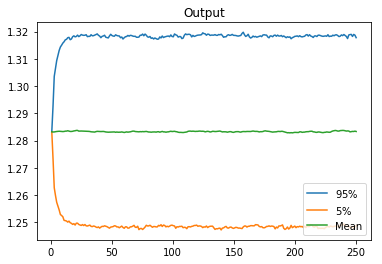

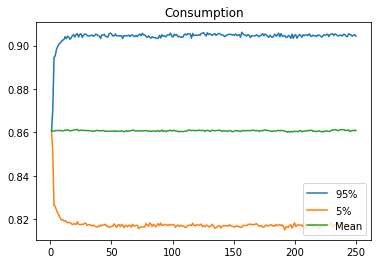

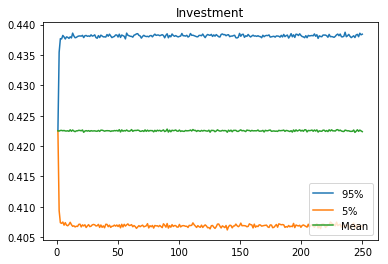

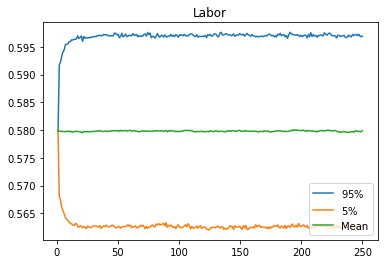

In [45]:
x = np.linspace(1,250,250-1)

cf_95 = np.percentile(gdp, 95, axis=0)
cf_5 = np.percentile(gdp, 5, axis=0)
mean = np.mean(gdp, axis=0)
plt.plot(x, cf_95, label=r'$95\%$')
plt.plot(x, cf_5, label=r'$5\%$')
plt.plot(x, mean, label='Mean')
plt.title("Output")
plt.legend(loc="lower right")
plt.show()

cf_95 = np.percentile(consum, 95, axis=0)
cf_5 = np.percentile(consum, 5, axis=0)
mean = np.mean(consum, axis=0)
plt.plot(x, cf_95, label=r'$95\%$')
plt.plot(x, cf_5, label=r'$5\%$')
plt.plot(x, mean, label='Mean')
plt.title("Consumption")
plt.legend(loc="lower right")
plt.show()

cf_95 = np.percentile(invest, 95, axis=0)
cf_5 = np.percentile(invest, 5, axis=0)
mean = np.mean(invest, axis=0)
plt.plot(x, cf_95, label=r'$95\%$')
plt.plot(x, cf_5, label=r'$5\%$')
plt.plot(x, mean, label='Mean')
plt.title("Investment")
plt.legend(loc="lower right")
plt.show()

cf_95 = np.percentile(labor, 95, axis=0)
cf_5 = np.percentile(labor, 5, axis=0)
mean = np.mean(labor, axis=0)
plt.plot(x, cf_95, label=r'$95\%$')
plt.plot(x, cf_5, label=r'$5\%$')
plt.plot(x, mean, label='Mean')
plt.title("Labor")
plt.legend(loc="lower right")
plt.show()


### Problem 8 

In [46]:
def summ_simulations(var, var_name):
    mean = var.mean(axis=1)
    vol = var.std(axis=1)
    variat = mean / vol 
    rel_vol = vol / gdp.std(axis=1)
    persis = np.corrcoef(var[0][:-1],var[0][1:])
    cycl = np.corrcoef(var[0],gdp[0])
    
    print(var_name)
    print("Mean:", np.mean(mean))
    print("Standard Error:", scipy.stats.sem(mean))
    print("Volatility:", np.mean(vol))
    print("Standard Error:",scipy.stats.sem(vol))
    print("Coefficient of Variation:", np.mean(variat))
    print("Standard Error:",scipy.stats.sem(variat))
    print("Rel Variation:", np.mean(rel_vol))
    print("Standard Error:",scipy.stats.sem(rel_vol))
    print("Persistance:", np.mean(persis))
    print("Standard Error:",scipy.stats.sem(persis))
    print("Cyclicality:", np.mean(cycl))
    print("Standard Error:",scipy.stats.sem(cycl))

In [47]:
summ_simulations(gdp, "GDP")

GDP
Mean: 1.2832698875204962
Standard Error: 5.7150769848200244e-05
Volatility: 0.020093680045456995
Standard Error: 2.730534034183422e-05
Coefficient of Variation: 65.0395743995912
Standard Error: 0.0880901668492939
Rel Variation: 1.0
Standard Error: 0.0
Persistance: 0.9434041783313253
Standard Error: [0.05659582 0.05659582]
Cyclicality: 1.0
Standard Error: [0. 0.]


In [48]:
summ_simulations(consum, "Consumption")

Consumption
Mean: 0.8607472431662849
Standard Error: 6.122483915112028e-05
Volatility: 0.02553342405704554
Standard Error: 2.5537518371269042e-05
Coefficient of Variation: 34.04153072205558
Standard Error: 0.03349823687855912
Rel Variation: 1.2770983947691856
Standard Error: 0.0005125981524597757
Persistance: 0.7996683444097044
Standard Error: [0.20033166 0.20033166]
Cyclicality: 0.9717647584134287
Standard Error: [0.02823524 0.02823524]


In [49]:
summ_simulations(invest, "Investment")

Investment
Mean: 0.42252290928598724
Standard Error: 3.945549830461692e-06
Volatility: 0.009453746747978517
Standard Error: 4.82771491820664e-06
Coefficient of Variation: 44.81066624195464
Standard Error: 0.022971074698958538
Rel Variation: 0.4786655885013581
Standard Error: 0.0006586735015245317
Persistance: 0.3546821668913983
Standard Error: [0.64531783 0.64531783]
Cyclicality: 0.40663134524639366
Standard Error: [0.59336865 0.59336865]


In [50]:
summ_simulations(labor, "Labor")

Labor
Mean: 0.5797924752779108
Standard Error: 2.517815499389814e-05
Volatility: 0.010025021407204153
Standard Error: 1.079327806645498e-05
Coefficient of Variation: 58.49413873115301
Standard Error: 0.06201070948845074
Rel Variation: 0.5008917954880824
Standard Error: 0.00016295092782891217
Persistance: 0.806674481474515
Standard Error: [0.19332552 0.19332552]
Cyclicality: 0.07695917496771237
Standard Error: [0.92304083 0.92304083]


### Exercise 9 

In [51]:
alpha = .33
beta = .95
gamma = 2.5
delta = .08
rho = .9
sigma = .02
xi = 1.5
a = 0.5
tau = 0.05
mparams = (alpha, beta, gamma, delta, tau, sigma, a)

In [73]:
def impulse(periods, time, shock, plot=True):
    
    epshist = np.zeros((periods, 1))
    epshist[time] = shock

    guessXY = np.array([1., .5]) # guess for state variables k and l 
    zbar = np.array([0.])
    XYbar = LinApp_FindSS(Gamma, mparams, guessXY, zbar, 1, 1)
    kbar = XYbar[0]
    lbar = XYbar[1]
    kbar2 = np.array([[kbar]])
    
    # iteratively generate Z's starting with the first value of Z = 0
    zhist = np.zeros((periods,1))
    for t in range(1, periods):
        zhist[t,:] = rho * zhist[t-1,:] + epshist[t,:]
    
    khist, lhist = LinApp_SSL(kbar2, zhist, XYbar, takelogs, PP, QQ, RR, SS)

    # initialize histories of all other variables
    yhist = np.zeros(periods)
    rhist = np.zeros(periods)
    whist = np.zeros(periods)
    chist = np.zeros(periods)
    Thist = np.zeros(periods)
    uhist = np.zeros(periods)

    # set initial values noting we started at the steady state
    yhist[0] = ybar
    rhist[0] = rbar
    whist[0] = wbar
    chist[0] = cbar
    Thist[0] = Tbar
    uhist[0] = ubar

    #compute values for all other time periods
    for t in range(0, periods-1):
        yhist[t], rhist[t], whist[t], chist[t], Thist[t], uhist[t] = \
            modeldefs(khist[t-1], khist[t], lhist[t], zhist[t,:], mparams)

    ihist = khist[:-1] - (1 - delta) * khist[1:]
    
    shock = zhist[:-1]
    gdp = yhist[:-1]
    consum = chist[:-1]
    invest = ihist.flatten()
    labor = lhist[:-1].flatten()
    wage = whist[:-1].flatten()
    capital = khist[:-1]
    
    if plot:
        x = np.linspace(1, periods-1, periods-1)
        
        
        fig, axes = plt.subplots(3, 2, figsize=(12,10))
        
        axes[0,0].plot(x, shock)
        axes[0,0].set_xlabel("Periods")
        axes[0,0].set_ylabel("Value")
        axes[0,0].set_title("Shock")
        
        axes[0,1].plot(x, gdp)
        axes[0,1].set_xlabel("Periods")
        axes[0,1].set_ylabel("Value")
        axes[0,1].set_title("Impulse Response: GDP")
        
        axes[1,0].plot(x, consum)
        axes[1,0].set_xlabel("Periods")
        axes[1,0].set_ylabel("Value")
        axes[1,0].set_title("Impulse Response: Consumption")
        
        axes[1,1].plot(x, invest)
        axes[1,1].set_xlabel("Periods")
        axes[1,1].set_ylabel("Value")
        axes[1,1].set_title("Impulse Response: Investment")
        
        axes[2,0].plot(x, labor)
        axes[2,0].set_xlabel("Periods")
        axes[2,0].set_ylabel("Value")
        axes[2,0].set_title("Impulse Response: Labor")
        
        axes[2,1].plot(x, capital)
        axes[2,1].set_xlabel("Periods")
        axes[2,1].set_ylabel("Value")
        axes[2,1].set_title("Impulse Response: Capital")
    
        plt.tight_layout()
        plt.show()
    
    return yhist[:-1], chist[:-1], ihist.flatten(), lhist[:-1].flatten()

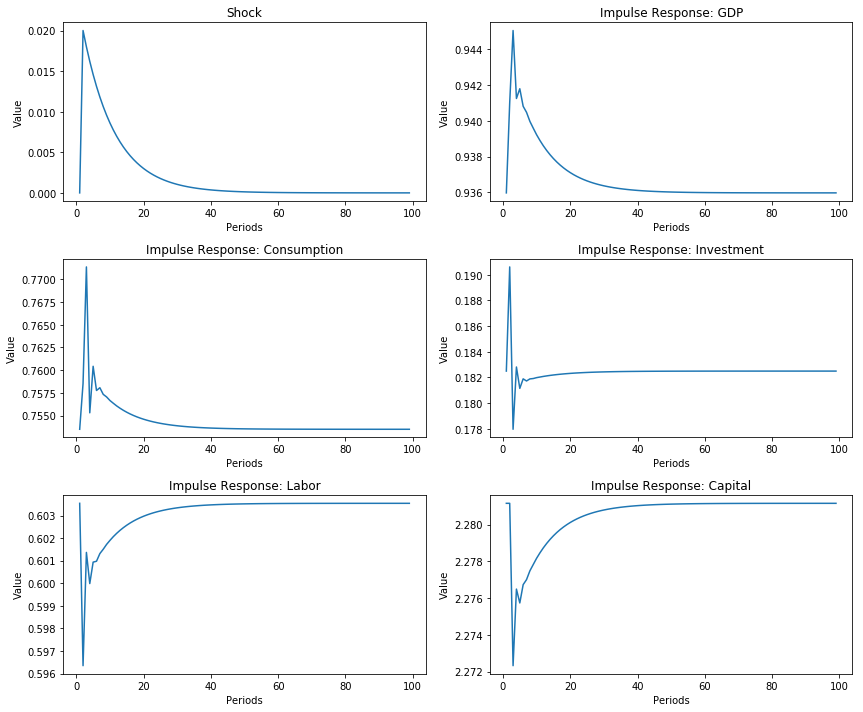

In [77]:
gdp, consum, invest, labor = impulse(100, 1, sigma)